In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv(r'C:\Users\EELU\Desktop\dataset_.csv')

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,medical charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
df.tail()

,age,sex,bmi,children,smoker,region,medical charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              1338 non-null   int64  
 1   sex              1338 non-null   object 
 2   bmi              1338 non-null   float64
 3   children         1338 non-null   int64  
 4   smoker           1338 non-null   object 
 5   region           1338 non-null   object 
 6   medical charges  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [12]:
df.describe()

,age,bmi,children,medical charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [14]:
df.isnull().sum()

age                0
sex                0
bmi                0
children           0
smoker             0
region             0
medical charges    0
dtype: int64

In [16]:
df.duplicated().sum()

1

In [18]:
df.drop_duplicates(inplace=True)

In [20]:
df.shape

(1337, 7)

In [24]:
df.dtypes

age                  int64
sex                 object
bmi                float64
children             int64
smoker              object
region              object
medical charges    float64
dtype: object

In [26]:
df['smoker']= df['smoker'].astype('category')
df['region']= df['region'].astype('category')

In [28]:
print(df['smoker'].value_counts())
print(df['region'].value_counts())
print(df['sex'].value_counts())

smoker
no     1063
yes     274
Name: count, dtype: int64
region
southeast    364
southwest    325
northeast    324
northwest    324
Name: count, dtype: int64
sex
male      675
female    662
Name: count, dtype: int64


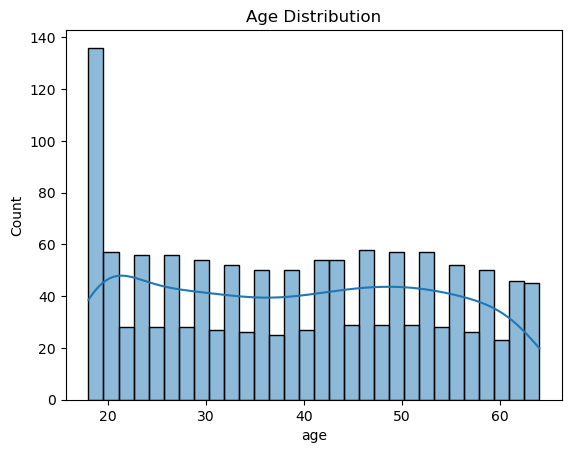

In [42]:
sns.histplot(df['age'],bins=30,kde=True)
plt.title('Age Distribution')
plt.show()

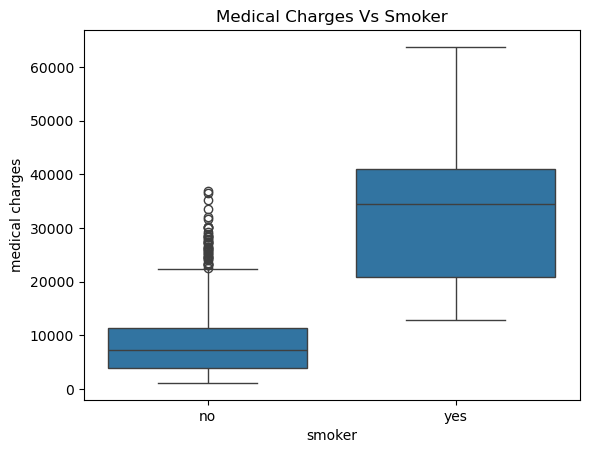

In [46]:
sns.boxplot(x='smoker' , y='medical charges' , data=df)
plt.title('Medical Charges Vs Smoker')
plt.show()

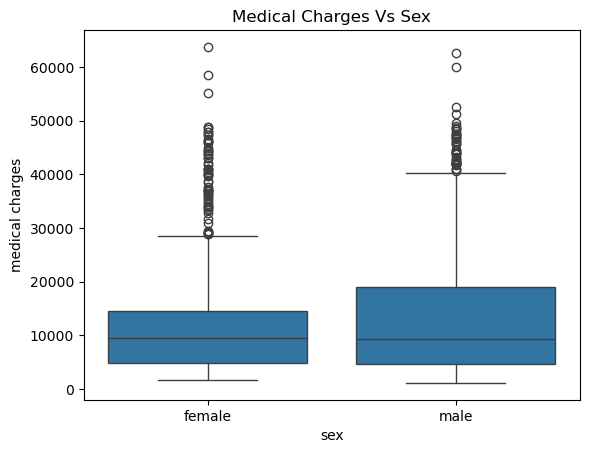

In [48]:
sns.boxplot(x='sex' , y='medical charges' , data=df)
plt.title('Medical Charges Vs Sex')
plt.show()

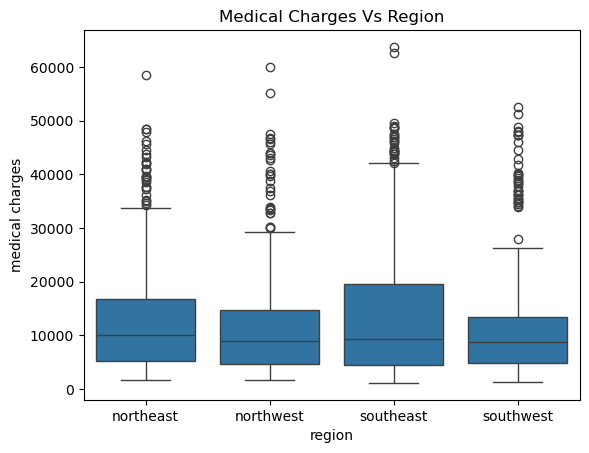

In [50]:
sns.boxplot(x='region' , y='medical charges' , data=df)
plt.title('Medical Charges Vs Region')
plt.show()

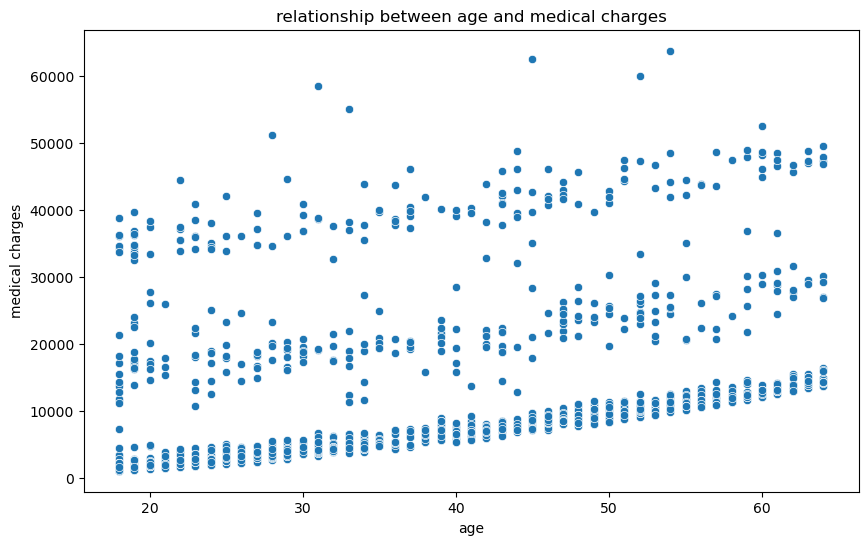

In [72]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='age' , y='medical charges' , data=df)
plt.title('relationship between age and medical charges')
plt.xlabel('age')
plt.ylabel('medical charges')
plt.show()

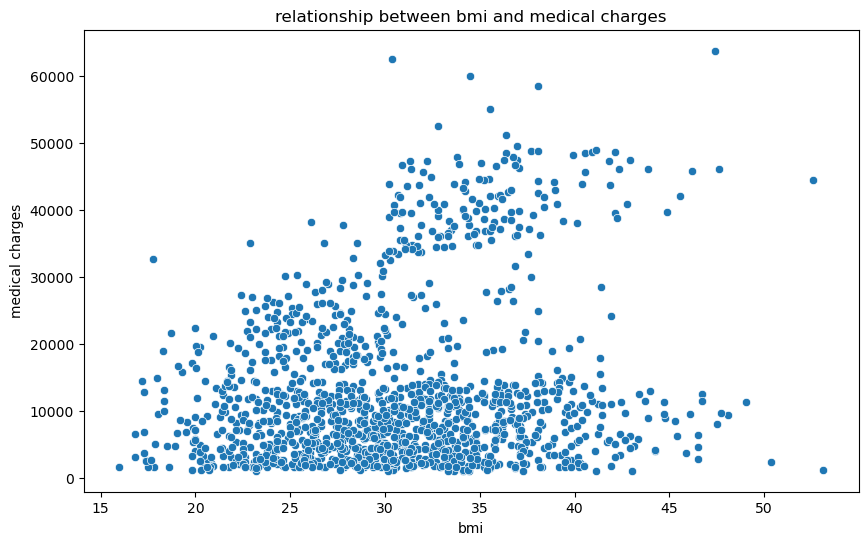

In [74]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='bmi' , y='medical charges' , data=df)
plt.title('relationship between bmi and medical charges')
plt.xlabel('bmi')
plt.ylabel('medical charges')
plt.show()

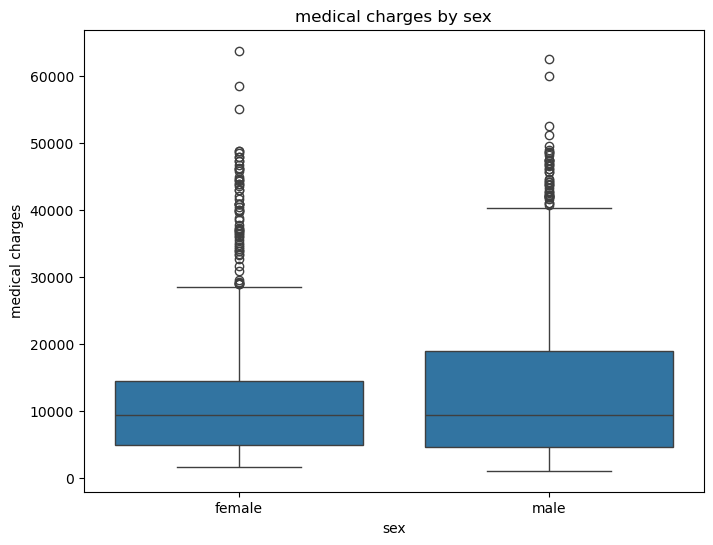

In [76]:
plt.figure(figsize=(8,6))
sns.boxplot(x='sex' , y='medical charges' , data=df)
plt.title('medical charges by sex')
plt.xlabel('sex')
plt.ylabel('medical charges')
plt.show()

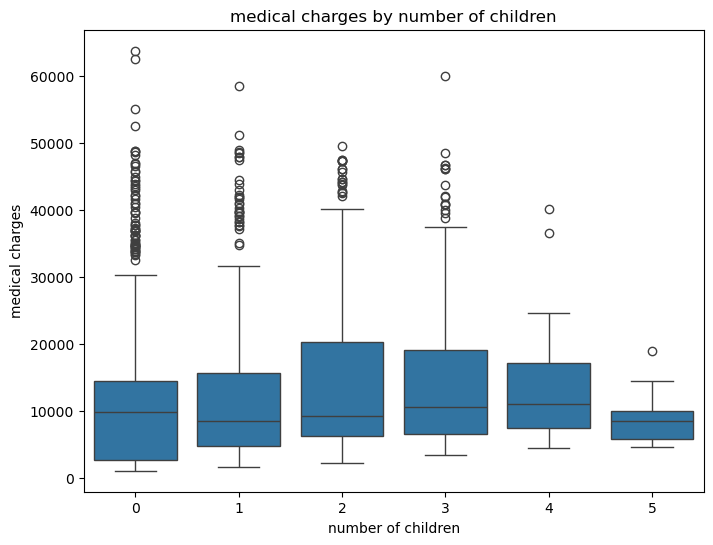

In [78]:
plt.figure(figsize=(8,6))
sns.boxplot(x='children' , y='medical charges' , data=df)
plt.title('medical charges by number of children')
plt.xlabel('number of children')
plt.ylabel('medical charges')
plt.show()

In [80]:
df_encoded = pd.get_dummies(df , drop_first=True)

In [82]:
x= df_encoded.drop('medical charges' , axis=1)
y= df_encoded['medical charges']

In [84]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [86]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [88]:
y_pred = model.predict(x_test)

In [90]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)
print("mean squared error:",mse)
print("r-squared score:",r2)

mean squared error: 35478020.67523561
r-squared score: 0.8069287081198011


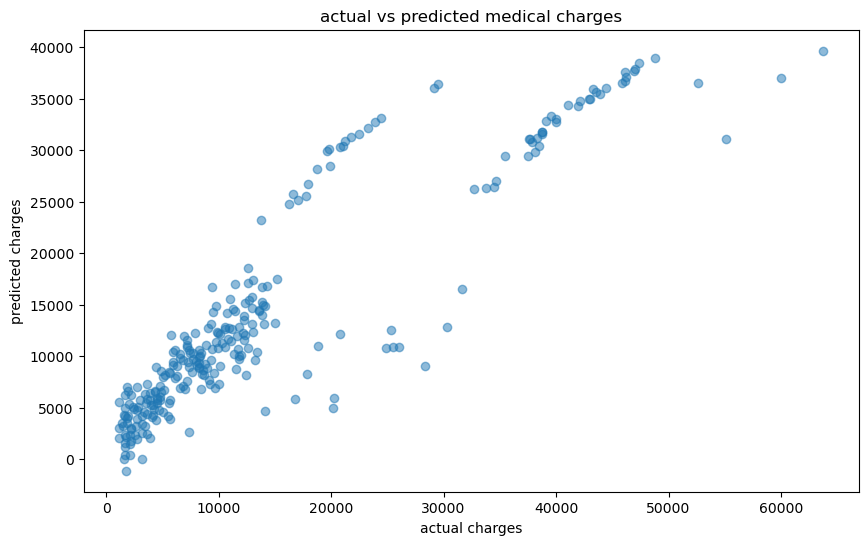

In [92]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("actual charges")
plt.ylabel("predicted charges")
plt.title("actual vs predicted medical charges")
plt.show()

In [94]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print("r-squared score:", r2)


r-squared score: 0.8069287081198011


In [96]:
r2_score_percent = r2_score(y_test, y_pred) * 100
print("r-squared (%):", r2_score_percent)

r-squared (%): 80.69287081198011
